### **Spaceship Titanic**<br>
**Predict which passengers are transported to an alternate dimension**

`Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.`

`The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.`

`While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!`

<img src="joel-filipe-QwoNAhbmLLo-unsplash.jpg" alt="Alt Text" width="400" height="300">


**`To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.`**

In [48]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer


In [49]:
# Load the train data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [50]:
print('Training dataset shape is: ', train_data.shape)
print('Testing data shape is: ', test_data.shape)

Training dataset shape is:  (8693, 14)
Testing data shape is:  (4277, 13)


**The training dataset contains 8693 rows and 14 columns.<br> The testing data contains 4277 rows and 13 columns**

In [51]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [52]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [53]:
# Checking duplicates
print(f'Duplicates on training data: {train_data.duplicated().sum()}, ({100*train_data.duplicated().sum()/len(train_data)})%')
print(f'Duplicates on the testing data: {test_data.duplicated().sum()}, ({100*test_data.duplicated().sum()/len(test_data)})% ')

Duplicates on training data: 0, (0.0)%
Duplicates on the testing data: 0, (0.0)% 


In [54]:
# Check the datatypes of the datasets's columns
print('Training dataset data types:\n', train_data.dtypes)
print('\n'+'#'*100)
print('\nData types of features in the testing data:\n', test_data.dtypes)

Training dataset data types:
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

####################################################################################################

Data types of features in the testing data:
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


**We can observe that CryoSleep & VIP features contains boolean values but their data type is object so we have to convert their data-type to bool.**

In [55]:
df1 = (train_data.isnull().sum()[train_data.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing Values"})
df1["% of Missing Values"] = round((100*train_data.isnull().sum()/len(train_data)),2)
print('Missing values in the training dataste:\n', df1)

print('\n'+ '#'*100)

df2 = (test_data.isnull().sum()[test_data.isnull().sum()>0]).to_frame().rename(columns={0:'Number of Missing Values'})
df2['% of Missing Values'] = round((100*test_data.isnull().sum()/len(test_data)),2)
print('\nMissing values in the testing data:\n', df2)

Missing values in the training dataste:
               Number of Missing Values  % of Missing Values
HomePlanet                         201                 2.31
CryoSleep                          217                 2.50
Cabin                              199                 2.29
Destination                        182                 2.09
Age                                179                 2.06
VIP                                203                 2.34
RoomService                        181                 2.08
FoodCourt                          183                 2.11
ShoppingMall                       208                 2.39
Spa                                183                 2.11
VRDeck                             188                 2.16
Name                               200                 2.30

####################################################################################################

Missing values in the testing data:
               Number of Missing Values 

**Quite a number of columns contain missing values.<br>However, there is very less % of missing values in both training & testing data. <br>So instead of dropping those missing values we will fill/replace those missing values with best suitable values according to the data.**

In [56]:
# Checking cardinality of categorical features
print('Cardinality of features in the training data:\n', train_data.select_dtypes(include='object').nunique())
print('\n'+'#'*100)
print('\nCardinality of categorical features in the testing data:\n', test_data.select_dtypes(include='object').nunique())

Cardinality of features in the training data:
 PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

####################################################################################################

Cardinality of categorical features in the testing data:
 PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


**We can observe that PassengerId, Cabin & Name feature of both datasets are having high cardinality.**

#### **Exploratory Data Analysis (EDA)**

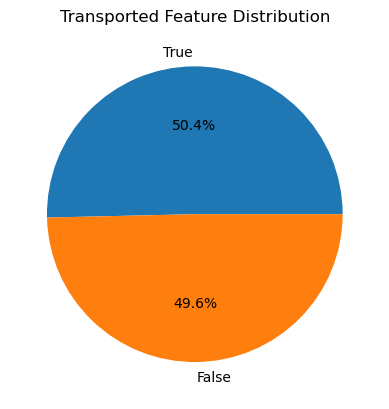

In [57]:
# Transported
plt.pie(train_data["Transported"].value_counts(),labels=train_data["Transported"].value_counts().keys(),autopct="%1.1f%%")
plt.title("Transported Feature Distribution");

**We can observe that our Transported Feature is highly balanced.**

In [58]:
# Examine the homeplanet column
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

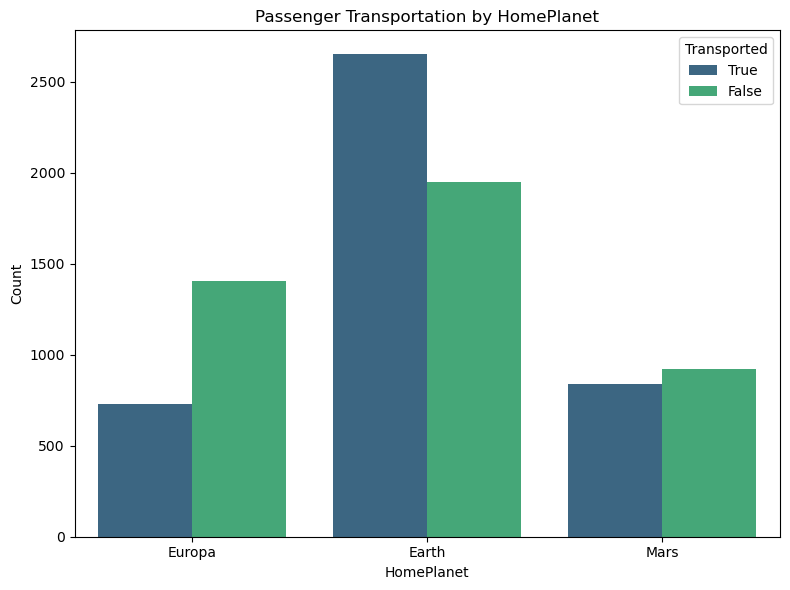

In [59]:
# Bar plot (HomePlanet)
plt.figure(figsize=(8, 6))
sns.countplot(data= train_data, x='HomePlanet', hue='Transported', palette='viridis')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.title('Passenger Transportation by HomePlanet')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**From the bar plot, most passengers who were trasported were from planet earth.**

In [60]:
train_data['Age'].unique()

array([39., 24., 58., 33., 16., 44., 26., 28., 35., 14., 34., 45., 32.,
       48., 31., 27.,  0.,  1., 49., 29., 10.,  7., 21., 62., 15., 43.,
       47.,  2., 20., 23., 30., 17., 55.,  4., 19., 56., nan, 25., 38.,
       36., 22., 18., 42., 37., 13.,  8., 40.,  3., 54.,  9.,  6., 64.,
       67., 61., 50., 41., 57., 11., 52., 51., 46., 60., 63., 59.,  5.,
       79., 68., 74., 12., 53., 65., 71., 75., 70., 76., 78., 73., 66.,
       69., 72., 77.])

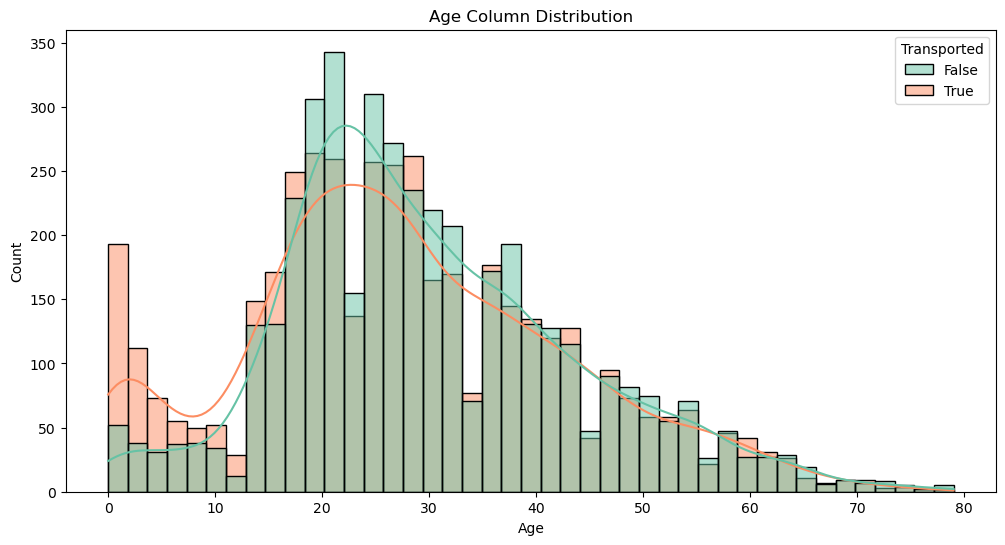

In [61]:
# Age distribution
plt.figure(figsize=(12,6))
sns.histplot(data=train_data, x='Age', hue='Transported',kde=True, palette='Set2')
plt.title('Age Column Distribution')
plt.show();

**Most of the passengers were between age 18-32.<br>Age from 0-18 passengers are highly transported when compared with not transported passengers espically for those who were new born.<br>Age from 18-32 passengers are comparatively less transported when compared to not transported passengers.<br>Age above 32 seems to be equally transported when compared to not transported passengers.**

In [62]:
# (Age)
age_bins = [0, 18, 30, 45, 60, 80]  
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

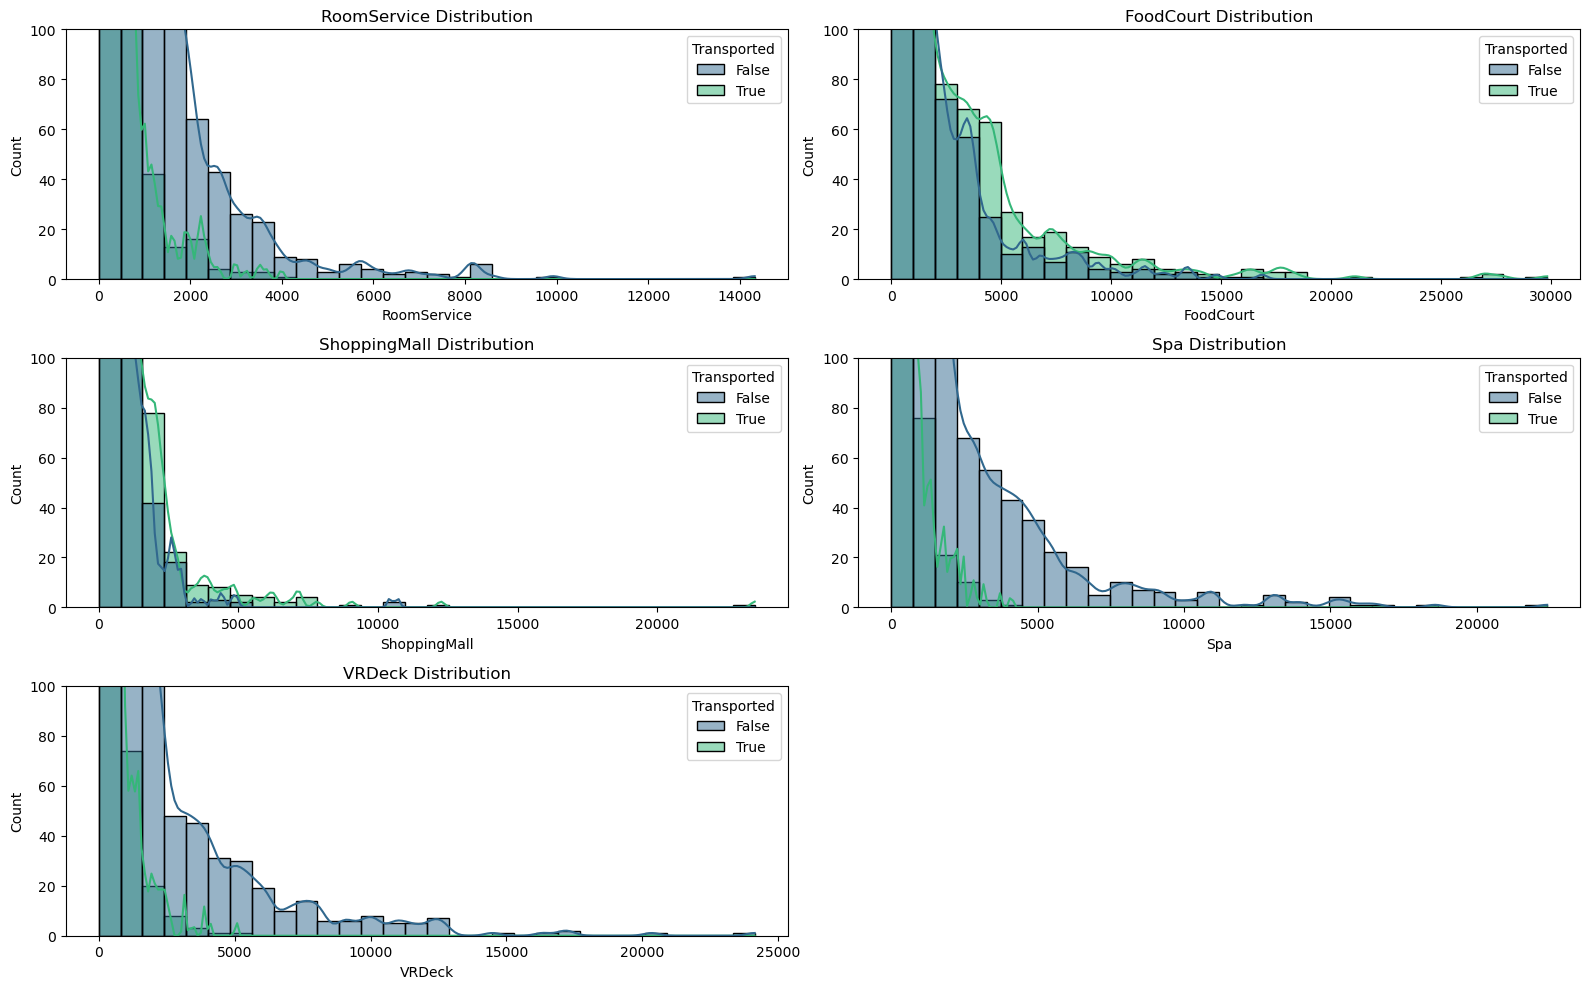

In [68]:
# Visualizing the expenditure columns
exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(16,10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3,2, idx+1)
    sns.histplot(data=train_data, x=column, hue='Transported', kde=True, palette='viridis', bins=30)
    plt.title(f'{column} Distribution')
    plt.ylim(0,100)
    plt.tight_layout();

**We can observe that most of the passengers don't seem to spend any money.<br><br>Since most of the expenses are 0 so the values with higher expenses are kind of outliers in our data.<br><br>We can observe that RoomService,Spa & VRDeck seems to have similar distributions.<br><br>We can also observe that FoodCourt & ShoppingMall are having kind of similar distributions.<br><br>All the expenditure features distribution is Right-Skewed.<br><br>Passengers having less expenses are more likely to be transported than passengers having high expenses.**

In [69]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [70]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Visualizing categorical columns
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination']
plt.figure(figsize=(14,7))
for idx, column in enumerate(cat_cols):
    

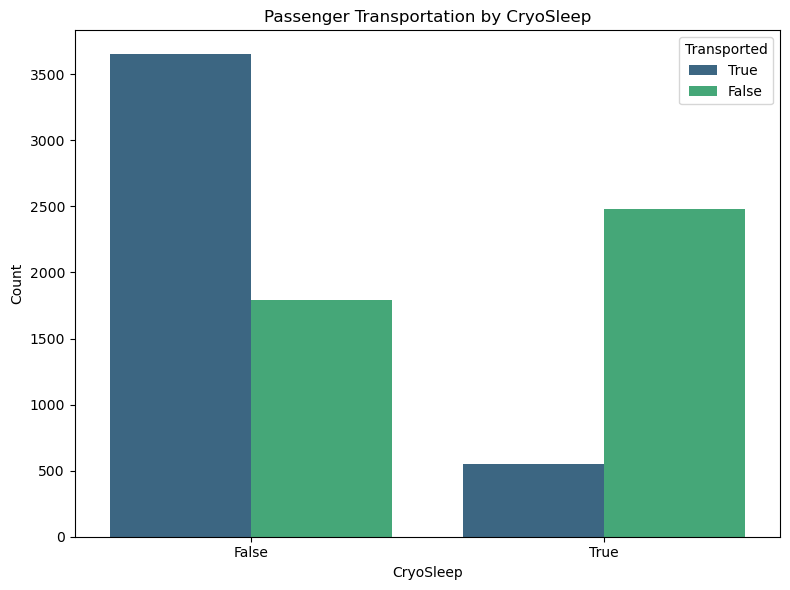

In [105]:
# Bar plot (CryoSleep)
plt.figure(figsize=(8, 6))
sns.countplot(data= train_data, x='CryoSleep', hue='Transported', palette='viridis')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Passenger Transportation by CryoSleep')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**The graph shows that there are more passengers not transported in cryosleep than passengers transported in cryosleep. This suggests that there is a significant demand for cryosleep transportation, but that the technology is not yet mature or affordable enough to meet this demand.**

In [106]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

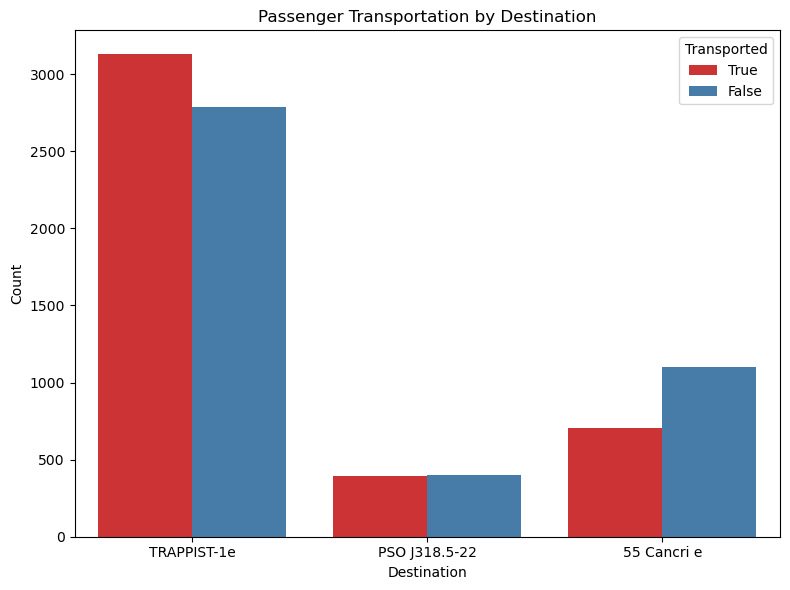

In [107]:
# Bar Plot (Destination)
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='Destination', hue='Transported', palette='Set1')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Passenger Transportation by Destination')
plt.legend(title='Transported', labels=['True', 'False'])
plt.tight_layout()
plt.show()

**The graph shows that the most common destination for passengers who were mostly transported is TRAPPIST-1e and PSO J318.5-22.**

### **Dealing with missing values**

In [108]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,31-45
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,19-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,46-60
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,31-45
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,31-45
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0-18
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,19-30
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,31-45


In [109]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Cabin', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'AgeGroup']
train_data = train_data.drop(columns_to_drop, axis=1)
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,False
8689,Earth,True,PSO J318.5-22,18.0,False
8690,Earth,False,TRAPPIST-1e,26.0,True
8691,Europa,False,55 Cancri e,32.0,False


**Dropped columns i would not use and retained 5.**

In [110]:
# Check missing values in the remaining columns
print_missing_values(train_data)


Columns with missing values:

             Count  Percentage
HomePlanet     201    2.312205
CryoSleep      217    2.496261
Destination    182    2.093639
Age            179    2.059128


In [111]:
train_data = train_data.dropna()

In [112]:
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,False
1,Earth,False,TRAPPIST-1e,24.0,True
2,Europa,False,TRAPPIST-1e,58.0,False
3,Europa,False,TRAPPIST-1e,33.0,False
4,Earth,False,TRAPPIST-1e,16.0,True
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,False
8689,Earth,True,PSO J318.5-22,18.0,False
8690,Earth,False,TRAPPIST-1e,26.0,True
8691,Europa,False,55 Cancri e,32.0,False


In [113]:
print_missing_values(train_data)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


### **Data Preprocessing**

In [114]:
train_data['Transported'] = train_data['Transported'].astype(int)
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,0
1,Earth,False,TRAPPIST-1e,24.0,1
2,Europa,False,TRAPPIST-1e,58.0,0
3,Europa,False,TRAPPIST-1e,33.0,0
4,Earth,False,TRAPPIST-1e,16.0,1
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,0
8689,Earth,True,PSO J318.5-22,18.0,0
8690,Earth,False,TRAPPIST-1e,26.0,1
8691,Europa,False,55 Cancri e,32.0,0


In [115]:
train_data['Transported'].unique()

array([0, 1])

In [116]:
# Split the dataset
X = train_data.drop('Transported', axis=1)
y = train_data['Transported']

In [117]:
X

,HomePlanet,CryoSleep,Destination,Age
0,Europa,False,TRAPPIST-1e,39.0
1,Earth,False,TRAPPIST-1e,24.0
2,Europa,False,TRAPPIST-1e,58.0
3,Europa,False,TRAPPIST-1e,33.0
4,Earth,False,TRAPPIST-1e,16.0
...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0
8689,Earth,True,PSO J318.5-22,18.0
8690,Earth,False,TRAPPIST-1e,26.0
8691,Europa,False,55 Cancri e,32.0


In [118]:
X['CryoSleep'] = X['CryoSleep'].astype(int)
X

,HomePlanet,CryoSleep,Destination,Age
0,Europa,0,TRAPPIST-1e,39.0
1,Earth,0,TRAPPIST-1e,24.0
2,Europa,0,TRAPPIST-1e,58.0
3,Europa,0,TRAPPIST-1e,33.0
4,Earth,0,TRAPPIST-1e,16.0
...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0
8689,Earth,1,PSO J318.5-22,18.0
8690,Earth,0,TRAPPIST-1e,26.0
8691,Europa,0,55 Cancri e,32.0


In [119]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 7930, dtype: int32

In [120]:
# Create a column transformer

col_trans = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(categories='auto', handle_unknown='ignore'), ['HomePlanet', 'Destination'])
], remainder='passthrough')

pipe = Pipeline(steps=[
    ('col_trans', col_trans)
])

transformed_data = pipe.fit_transform(X)

# Get the one-hot encoded column names from the transformer
encoded_column_names = col_trans.named_transformers_['ohe'].get_feature_names_out(['HomePlanet', 'Destination'])

# Combine the encoded column names with the remaining column name
all_column_names = list(encoded_column_names) + ['CryoSleep','Age']

# Convert the transformed data back to a DataFrame with the correct column names
X = pd.DataFrame(transformed_data, columns=all_column_names)
X

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,39.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,58.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0
...,...,...,...,...,...,...,...,...
7925,0.0,1.0,0.0,1.0,0.0,0.0,0.0,41.0
7926,1.0,0.0,0.0,0.0,1.0,0.0,1.0,18.0
7927,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0
7928,0.0,1.0,0.0,1.0,0.0,0.0,0.0,32.0


### **Train Test Split**


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [122]:
X_train

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
1788,1.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0
7334,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0
1108,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0
1232,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
4238,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0
...,...,...,...,...,...,...,...,...
4931,1.0,0.0,0.0,0.0,0.0,1.0,0.0,24.0
3264,1.0,0.0,0.0,0.0,0.0,1.0,0.0,21.0
1653,0.0,1.0,0.0,1.0,0.0,0.0,1.0,56.0
2607,1.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0


### **Modeling**

#### **1. Logistic Regression**

In [123]:
# Libraries
from sklearn.linear_model import LogisticRegressionCV

logreg_params = {
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100]
}

logreg_model = LogisticRegressionCV(Cs=logreg_params['C'], cv=5)
logreg_model.fit(X_train, y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=5)

In [124]:
dir(logreg_model)

['C_',
 'Cs',
 'Cs_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'coefs_paths_',
 'cv',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio_',
 'l1_ratios',
 'l1_ratios_',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_lo

In [125]:
# After fitting the LogisticRegressionCV model
best_score = logreg_model.scores_[1].max()  # Get the best mean score for class 1 (positive class)
best_params = logreg_model.C_  # Get the best value of C

print("Best Mean Score:", best_score)
print("Best C:", best_params)


Best Mean Score: 0.7289204097714737
Best C: [0.1]


In [126]:
# Metrics
from sklearn.metrics import accuracy_score, recall_score

# Make predictions on the test dataset
logreg_y_pred = logreg_model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, logreg_y_pred)
recall = recall_score(y_test, logreg_y_pred)

print("Accuracy Score:", accuracy)
print('Recall score:', recall)


Accuracy Score: 0.7181588902900379
Recall score: 0.6234413965087282


In [127]:
# Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(LogisticRegression(),
                    param_grid=logreg_params,
                    scoring='recall', 
                    cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='recall')

In [128]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 'multim

In [129]:
def best_score_params(model):
    # Print the best score
    print('best score:', model.best_score_)

    # Print the best hyperparams
    print('best hyperparams:', model.best_params_)

best_score_params(grid)

best score: 0.6245334507042253
best hyperparams: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [130]:
def accuracy_recall(model):
    y_pred = model.predict(X_test)
    print("Accuracy score: ",accuracy_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))

accuracy_recall(grid)

Accuracy score:  0.71437578814628
Recall score:  0.6259351620947631


In [131]:
# Without parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
accuracy_recall(logreg)

Accuracy score:  0.7181588902900379
Recall score:  0.6234413965087282


**The metrics to be used is recall. <br> This is because the cost of missing a positive case (passengers who were transported) is high.**

#### **2. Decision Tree**

In [132]:
# Library
from sklearn.tree import DecisionTreeClassifier

decision_tree_params = {
    'criterion': ['gini'],
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'random_state': [42],
}

decision_treee_grid = GridSearchCV(DecisionTreeClassifier(),
                                   param_grid=decision_tree_params,
                                   cv=5,
                                   scoring='recall')

decision_treee_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [42]},
             scoring='recall')

In [133]:
best_score_params(decision_treee_grid)

best score: 0.6420539906103286
best hyperparams: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [134]:
accuracy_recall(decision_treee_grid)

Accuracy score:  0.7383354350567465
Recall score:  0.6408977556109726


In [135]:
# Without parameters
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
accuracy_recall(clf)

Accuracy score:  0.7181588902900379
Recall score:  0.6084788029925187


In [136]:
best_model = decision_treee_grid.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

#### **XGBoost**

In [137]:
# Library
import xgboost as xgb

xgboost_params = {
    'n_estimators': [100],
    'max_depth': [2],
    'learning_rate': [100],
    'gamma': [10],
    'subsample': [0.9],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
}

xgboost_grid = GridSearchCV(xgb.XGBClassifier(),
                            param_grid=xgboost_params,
                            cv=5)

xgboost_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [138]:
best_score_params(xgboost_grid)

best score: 0.7391238039838617
best hyperparams: {'eval_metric': 'logloss', 'gamma': 10, 'learning_rate': 100, 'max_depth': 2, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.9}


In [139]:
accuracy_recall(xgboost_grid)

Accuracy score:  0.7364438839848676
Recall score:  0.6346633416458853


In [140]:
# Without parameters
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)
accuracy_recall(xgbc)

Accuracy score:  0.7301387137452712
Recall score:  0.6172069825436409


#### **Support Vector Machine**

In [60]:
# Library
from sklearn.svm import SVC

svc_params = {
    'kernel': ['linear'],
    'C': [1,10,100],
    'gamma': [1, 10, 100]
}

svc_grid = GridSearchCV(SVC(),
                        param_grid=svc_params,
                        cv=3)
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 10, 100],
                         'kernel': ['linear']})

In [141]:
accuracy_recall(svc_grid)

Accuracy score:  0.723203026481715
Recall score:  0.5847880299251871


In [142]:
best_score_params(svc_grid)

best score: 0.7213118591729272
best hyperparams: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [143]:
model1 = grid
model2 = decision_treee_grid
model3 = xgboost_grid
model4 = svc_grid
# Create a list of the models
models = [model1, model2, model3, model4]

# Create lists to store accuracy and recall values
accuracy_values = []
recall_values = []

# Calculate accuracy and recall for each model and store the results
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    recall_values.append(recall)

# Create a DataFrame 
model_names = ['Logistic Regression', 'Decision Tree', 'XGBoost', 'SVM']
model_results = {
    'Model Name': model_names,
    'Accuracy': accuracy_values,
    'Recall': recall_values
}
results_df = pd.DataFrame(model_results)
results_df

,Model Name,Accuracy,Recall
0,Logistic Regression,0.714376,0.625935
1,Decision Tree,0.738335,0.640898
2,XGBoost,0.736444,0.634663
3,SVM,0.723203,0.584788


In [144]:
# Find the best model based on recall
best_model = results_df.loc[results_df['Recall'].idxmax()]

print("Best Model (based on Recall):")
best_model

Best Model (based on Recall):


Model Name    Decision Tree
Accuracy           0.738335
Recall             0.640898
Name: 1, dtype: object

In [145]:
X_test

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Age
7685,0.0,0.0,1.0,1.0,0.0,0.0,0.0,32.0
188,0.0,0.0,1.0,0.0,0.0,1.0,0.0,33.0
642,0.0,1.0,0.0,1.0,0.0,0.0,0.0,65.0
2550,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66.0
7111,0.0,0.0,1.0,0.0,0.0,1.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2915,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0
6788,1.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0
1726,1.0,0.0,0.0,0.0,1.0,0.0,1.0,46.0


In [148]:
train_data

,HomePlanet,CryoSleep,Destination,Age,Transported
0,Europa,False,TRAPPIST-1e,39.0,0
1,Earth,False,TRAPPIST-1e,24.0,1
2,Europa,False,TRAPPIST-1e,58.0,0
3,Europa,False,TRAPPIST-1e,33.0,0
4,Earth,False,TRAPPIST-1e,16.0,1
...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,0
8689,Earth,True,PSO J318.5-22,18.0,0
8690,Earth,False,TRAPPIST-1e,26.0,1
8691,Europa,False,55 Cancri e,32.0,0


In [ ]:
predict = decision_treee_grid.predict(X_test)
predict

array([0, 0, 0, ..., 0, 1, 0])

In [232]:
# Test data
test_data = pd.read_csv('test.csv')
test_data['PassengerId'] = test_data['PassengerId'].astype(int)
test_data1 = test_data[['HomePlanet', 'CryoSleep', 'Destination', 'Age']]
test_data1['CryoSleep'] = test_data1['CryoSleep'].fillna(False)

test_data1['CryoSleep'] = test_data1[['CryoSleep']].astype(int)
test_data1 = pd.get_dummies(test_data1)
test_data1

,CryoSleep,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,1,0,0,0,0,1
1,0,19.0,1,0,0,0,0,1
2,1,31.0,0,1,0,1,0,0
3,0,38.0,0,1,0,0,0,1
4,0,20.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4272,1,34.0,1,0,0,0,0,1
4273,0,42.0,1,0,0,0,0,1
4274,1,NaN,0,0,1,1,0,0
4275,0,NaN,0,1,0,0,0,0


In [233]:
print_missing_values(test_data1)

Columns with missing values:

     Count  Percentage
Age     91     2.12766


In [234]:
test_data1['Age'] = test_data1['Age'].fillna(test_data1.Age.median())
test_data1


,CryoSleep,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,1,0,0,0,0,1
1,0,19.0,1,0,0,0,0,1
2,1,31.0,0,1,0,1,0,0
3,0,38.0,0,1,0,0,0,1
4,0,20.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4272,1,34.0,1,0,0,0,0,1
4273,0,42.0,1,0,0,0,0,1
4274,1,26.0,0,0,1,1,0,0
4275,0,26.0,0,1,0,0,0,0


In [235]:
print_missing_values(test_data1)

Columns with missing values:

Empty DataFrame
Columns: [Count, Percentage]
Index: []


In [236]:
prediction = decision_treee_grid.predict(test_data1)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [237]:
test_data['Transported'] = prediction
test_data 

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1301,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1
1,1801,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1
2,1901,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1
3,2101,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1
4,2301,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,926602,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,926901,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,1
4274,927101,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,1
4275,927301,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1


In [238]:
test_data.Transported.unique()

array([1])